# RNN 
### Sine Wave

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Data

In [2]:
x = np.linspace(0,50,501)
y = np.sin(x)

In [3]:
x[:5]

array([0. , 0.1, 0.2, 0.3, 0.4])

In [4]:
y[:5]

array([0.        , 0.09983342, 0.19866933, 0.29552021, 0.38941834])

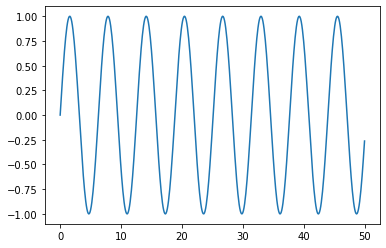

In [5]:
plt.plot(x,y)

In [6]:
df = pd.DataFrame(data=y,index=x,columns=['Sine'])

In [7]:
df.head()

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418


## Train Test Split

In [8]:
len(df)

501

In [9]:
test_percent = 0.1

In [10]:
len(df)*test_percent

50.1

In [11]:
test_point = np.round(len(df)*test_percent)

In [12]:
test_ind = int(len(df) - test_point)

In [13]:
test_ind

451

In [14]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [15]:
train.head()

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418


In [16]:
test.head()

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591


## Preprocessing - Scaling Data

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
scaler.fit(train)

MinMaxScaler()

In [20]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

In [21]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [22]:
# defining generator
length = 2 # Length of the output sequences 
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [23]:
len(scaled_train)

451

In [24]:
len(generator) # n_input = 2

449

In [25]:
X,y = generator[0]

In [26]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.49999912 0.54991622]
Predict this y: 
 [[0.59933458]]


In [27]:
# Let's redefine to get 10 steps back and then predict the next step out
length = 10 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [29]:
X,y = generator[0]

In [30]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[4.99999116e-01 5.49916225e-01 5.99334579e-01 6.47760405e-01
 6.94709850e-01 7.39713809e-01 7.82322618e-01 8.22110545e-01
 8.58680040e-01 8.91665714e-01 9.20737985e-01 9.45606372e-01
 9.66022399e-01 9.81782075e-01 9.92727935e-01 9.98750612e-01
 9.99789928e-01 9.95835500e-01 9.86926839e-01 9.73152957e-01
 9.54651478e-01 9.31607263e-01 9.04250562e-01 8.72854714e-01
 8.37733417e-01 7.99237589e-01 7.57751870e-01 7.13690771e-01
 6.67494535e-01 6.19624741e-01 5.70559686e-01 5.20789614e-01
 4.70811810e-01 4.21125636e-01 3.72227539e-01 3.24606094e-01
 2.78737119e-01 2.35078919e-01 1.94067715e-01 1.56113277e-01
 1.21594831e-01 9.08572769e-02 6.42077324e-02 4.19124713e-02
 2.41942605e-02 1.12301346e-02 3.14962674e-03 3.34747619e-05
 1.91281421e-03 8.76886734e-03]
Predict this y: 
 [[0.02053313]]


In [31]:
length = 50 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

### Creating Model

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,SimpleRNN

In [33]:
n_features = 1

In [34]:
model = Sequential()

model.add(SimpleRNN(50,input_shape=(length, n_features)))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit_generator(generator,epochs=5)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
401/401 [==============================] - 5s 11ms/step - loss: 0.0139
Epoch 2/5
401/401 [==============================] - 4s 10ms/step - loss: 2.6144e-05
Epoch 3/5
401/401 [==============================] - 4s 9ms/step - loss: 4.7409e-05
Epoch 4/5
401/401 [==============================] - 4s 9ms/step - loss: 0.0019
Epoch 5/5
401/401 [==============================] - 4s 9ms/step - loss: 1.0313e-05


In [37]:
model.history.history.keys()

dict_keys(['loss'])

<AxesSubplot:>

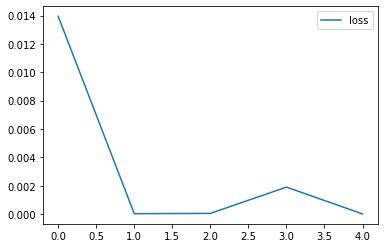

In [38]:
losses = pd.DataFrame(model.history.history)
losses.plot()

## Evaluation Test Data

In [39]:
first_eval_batch = scaled_train[-length:]

In [40]:
first_eval_batch

array([[8.37405820e-01],
       [7.98881698e-01],
       [7.57371240e-01],
       [7.13289205e-01],
       [6.67076045e-01],
       [6.19193508e-01],
       [5.70120021e-01],
       [5.20345908e-01],
       [4.70368497e-01],
       [4.20687145e-01],
       [3.71798252e-01],
       [3.24190300e-01],
       [2.78338972e-01],
       [2.34702398e-01],
       [1.93716581e-01],
       [1.55791039e-01],
       [1.21304709e-01],
       [9.06021693e-02],
       [6.39901882e-02],
       [4.17346643e-02],
       [2.40579672e-02],
       [1.11367167e-02],
       [3.10001778e-03],
       [2.81703720e-05],
       [1.95186738e-03],
       [8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],


In [41]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

In [42]:
model.predict(first_eval_batch)

array([[0.9497028]], dtype=float32)

In [43]:
scaled_test[0]

array([0.94955134])

In [44]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred) 

    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [48]:
test_predictions

[array([0.9497028], dtype=float32),
 array([0.96929216], dtype=float32),
 array([0.98416245], dtype=float32),
 array([0.9941781], dtype=float32),
 array([0.99912477], dtype=float32),
 array([0.9990534], dtype=float32),
 array([0.99393225], dtype=float32),
 array([0.983739], dtype=float32),
 array([0.96870977], dtype=float32),
 array([0.94895023], dtype=float32),
 array([0.92471695], dtype=float32),
 array([0.89637345], dtype=float32),
 array([0.8641613], dtype=float32),
 array([0.82853913], dtype=float32),
 array([0.78990126], dtype=float32),
 array([0.7485899], dtype=float32),
 array([0.70512784], dtype=float32),
 array([0.65985763], dtype=float32),
 array([0.6131015], dtype=float32),
 array([0.5653845], dtype=float32),
 array([0.51694536], dtype=float32),
 array([0.4682174], dtype=float32),
 array([0.41965505], dtype=float32),
 array([0.37150514], dtype=float32),
 array([0.32431653], dtype=float32),
 array([0.2785246], dtype=float32),
 array([0.23449476], dtype=float32),
 array([0.19

In [49]:
scaled_test

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


## Inverse Transformations and Compare

In [50]:
true_predictions = scaler.inverse_transform(test_predictions)

In [51]:
true_predictions

array([[ 0.89940015],
       [ 0.93857856],
       [ 0.9683189 ],
       [ 0.98835007],
       [ 0.99824329],
       [ 0.9981006 ],
       [ 0.98785833],
       [ 0.96747204],
       [ 0.93741378],
       [ 0.89789502],
       [ 0.84942885],
       [ 0.79274231],
       [ 0.72831855],
       [ 0.65707476],
       [ 0.57979963],
       [ 0.49717752],
       [ 0.41025415],
       [ 0.31971446],
       [ 0.22620292],
       [ 0.13076973],
       [ 0.03389222],
       [-0.06356292],
       [-0.16068683],
       [-0.25698589],
       [-0.35136235],
       [-0.44294546],
       [-0.53100445],
       [-0.61416204],
       [-0.69161321],
       [-0.76239274],
       [-0.82512787],
       [-0.8793745 ],
       [-0.92415606],
       [-0.95867662],
       [-0.9830825 ],
       [-0.99661418],
       [-0.99942546],
       [-0.99211544],
       [-0.97421933],
       [-0.94676179],
       [-0.91030622],
       [-0.86469311],
       [-0.81149511],
       [-0.75080912],
       [-0.68297415],
       [-0

In [52]:
test

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


In [53]:
test['Predictions'] = true_predictions

<ipython-input-53-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [54]:
test

,Sine,Predictions
45.1,0.899097,0.899400
45.2,0.938307,0.938579
45.3,0.968142,0.968319
45.4,0.988304,0.988350
45.5,0.998591,0.998243
45.6,0.998900,0.998101
45.7,0.989229,0.987858
45.8,0.969673,0.967472
45.9,0.940429,0.937414
46.0,0.901788,0.897895


<AxesSubplot:>

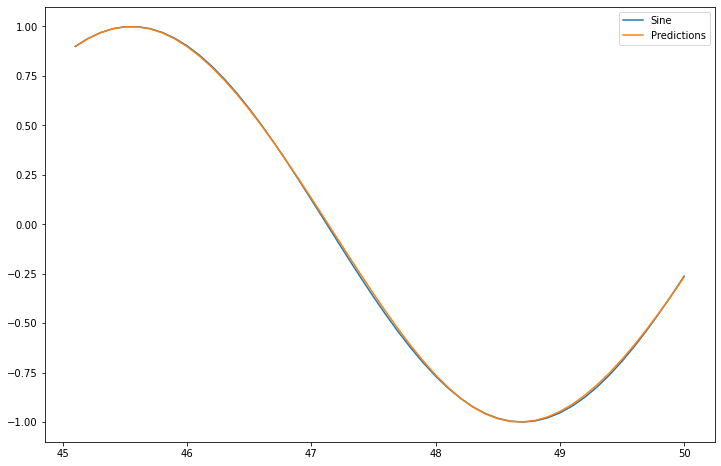

In [55]:
test.plot(figsize=(12,8))

## Adding in Early Stopping and Validation Generator

In [56]:
from tensorflow.keras.callbacks import EarlyStopping

In [57]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [58]:
length = 49
generator = TimeseriesGenerator(scaled_train,scaled_train,
                               length=length,batch_size=1)


validation_generator = TimeseriesGenerator(scaled_test,scaled_test,
                                          length=length,batch_size=1)

# LSTMS

In [59]:
model = Sequential()

model.add(LSTM(50,input_shape=(length, n_features)))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [60]:
model.fit_generator(generator,epochs=20,
                   validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/20
402/402 [==============================] - 8s 21ms/step - loss: 0.0193 - val_loss: 5.7052e-05
Epoch 2/20
402/402 [==============================] - 8s 20ms/step - loss: 8.5824e-05 - val_loss: 1.3945e-04
Epoch 3/20
402/402 [==============================] - 8s 20ms/step - loss: 4.0077e-04 - val_loss: 1.4369e-06
Epoch 4/20
402/402 [==============================] - 8s 20ms/step - loss: 8.9520e-05 - val_loss: 6.4238e-05
Epoch 5/20
402/402 [==============================] - 8s 20ms/step - loss: 9.0393e-05 - val_loss: 1.0182e-05


In [61]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

<ipython-input-62-0c99d0b30835>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM Predictions'] = true_predictions


<AxesSubplot:>

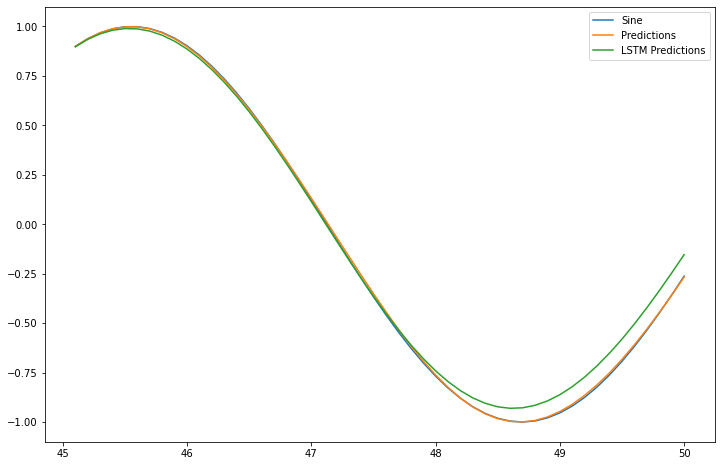

In [62]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions
test.plot(figsize=(12,8))

# Forecasting

In [63]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [64]:
length = 50 
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [65]:
model = Sequential()
model.add(LSTM(50, input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit_generator(generator,epochs=6)

Epoch 1/6
451/451 [==============================] - 9s 21ms/step - loss: 0.0086
Epoch 2/6
451/451 [==============================] - 10s 22ms/step - loss: 1.3800e-04
Epoch 3/6
451/451 [==============================] - 10s 21ms/step - loss: 1.2784e-04
Epoch 4/6
451/451 [==============================] - 10s 22ms/step - loss: 5.8027e-04
Epoch 5/6
451/451 [==============================] - 9s 21ms/step - loss: 1.3630e-04
Epoch 6/6
451/451 [==============================] - 9s 20ms/step - loss: 4.5221e-05


In [66]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [67]:
forecast = scaler.inverse_transform(forecast)

In [68]:
# forecast

In [69]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [70]:
len(forecast)

50

In [71]:
50*0.1

5.0

In [72]:
forecast_index = np.arange(50.1,55.1,step=0.1)

In [73]:
len(forecast_index)

50

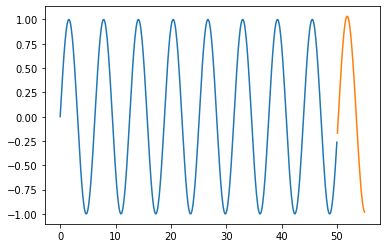

In [74]:
plt.plot(df.index,df['Sine'])
plt.plot(forecast_index,forecast)